In [132]:
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale 
import matplotlib.patches as mpatches 
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
from matplotlib import cm
import seaborn as sns 
import pandas as pd 
import numpy as np 
import warnings 
warnings.filterwarnings('ignore')

In [133]:
wine = pd.read_csv('wine.csv')
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [134]:
# dataset contains 178 observations 
# and 14 columns 
wine.shape

(178, 14)

In [135]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [136]:
# no null values present
wine.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [137]:
# features 
data = wine.iloc[:,1:]
data.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [138]:
# calsses 
target = wine[['Type']]
target.head()

,Type
0,1
1,1
2,1
3,1
4,1


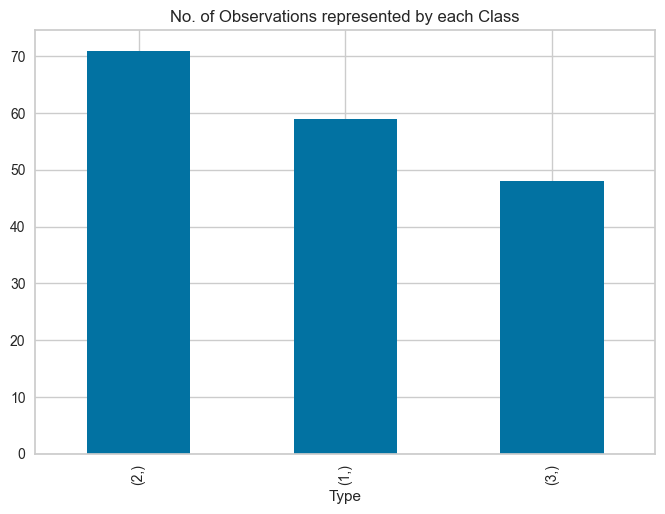

In [139]:
# 3 unique classes present 
target.value_counts().plot(kind='bar')
plt.title('No. of Observations represented by each Class')
plt.show()

In [140]:
# standardizing feature data to apply PCA
transData = scale(data)
# initializing PCA transformations
# with 3 components 
pca = PCA(n_components=3)

In [141]:
# PCA transformations on feature data
pcaValues = pca.fit_transform(transData)

In [142]:
# principle components and there coordinates
pcaDf = pd.DataFrame(pcaValues,
                     columns=['PC1','PC2','PC3']).head()

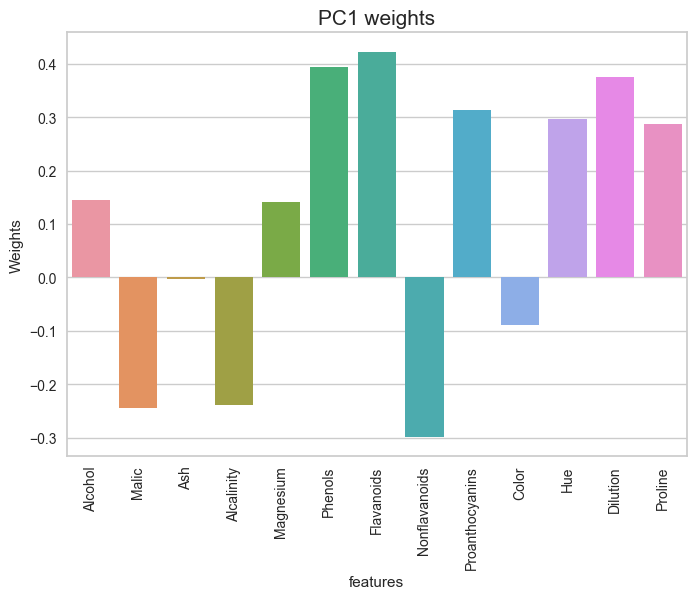

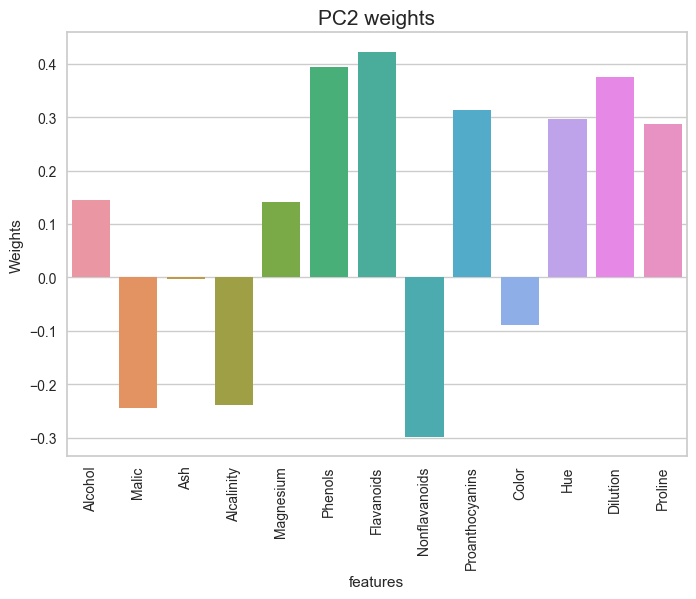

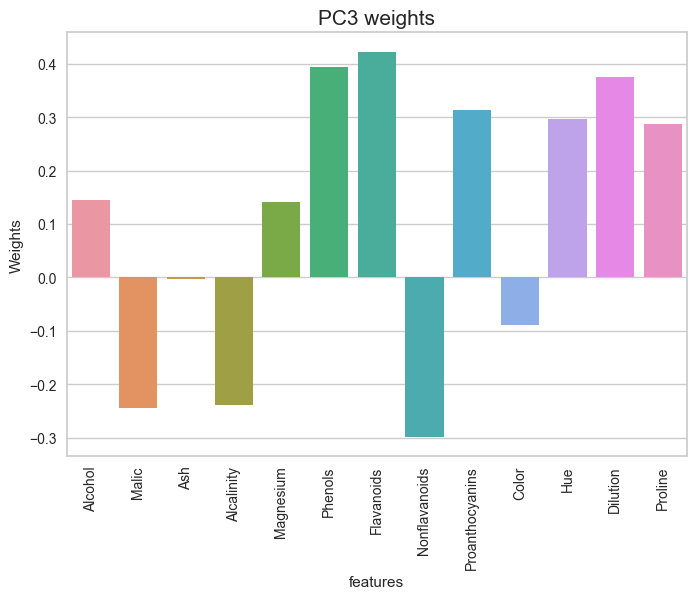

In [143]:
sns.barplot(x=data.columns,
            y=pca.components_[0])
plt.xticks(rotation=90)
plt.title('PC1 weights',fontsize=15)
plt.ylabel('Weights')
plt.xlabel('features')
plt.show()
sns.barplot(x=data.columns,
            y=pca.components_[0])
plt.xticks(rotation=90)
plt.title('PC2 weights',fontsize=15)
plt.ylabel('Weights')
plt.xlabel('features')
plt.show()
sns.barplot(x=data.columns,
            y=pca.components_[0])
plt.xticks(rotation=90)
plt.title('PC3 weights',fontsize=15)
plt.ylabel('Weights')
plt.xlabel('features')
plt.show()

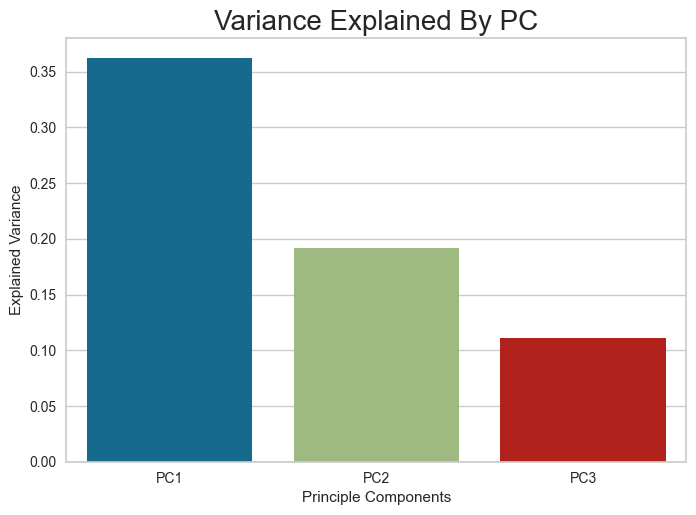

In [144]:
# variance in feature data explained by each principle component
sns.barplot(x=['PC1','PC2','PC3'],y=pca.explained_variance_ratio_)
plt.title('Variance Explained By PC',fontsize=20)
plt.xlabel('Principle Components')
plt.ylabel('Explained Variance')
plt.show()

In [145]:
# Principle Components and their data coordinates
pcaDf

,PC1,PC2,PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


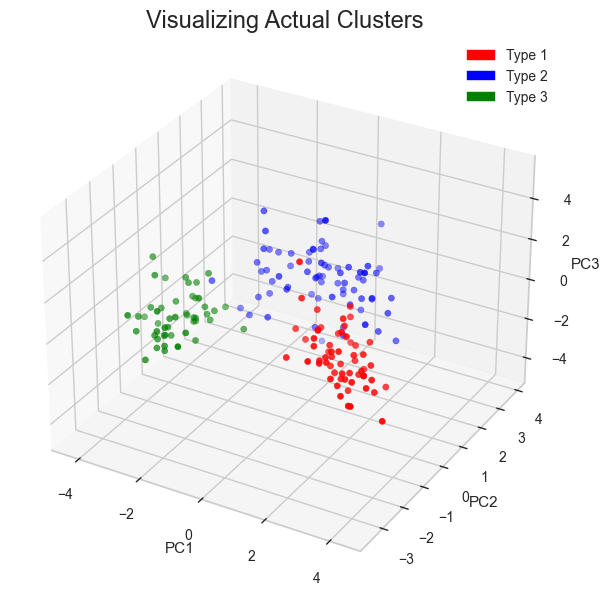

In [146]:
# Principle Component Coordinates
label = target.replace([1,2,3],['red','blue','green']).values.ravel()
pcX = pcaValues[:,0]
pcY = pcaValues[:,1]
pcZ = pcaValues[:,2]
fig = plt.figure()
ax = Axes3D(fig)
scatter = ax.scatter3D(pcX,pcY,pcZ,c=label)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Visualizing Actual Clusters',fontsize=17)
plt.legend(handles=[mpatches.Patch(color='red',label='Type 1'),
                    mpatches.Patch(color='blue',label='Type 2'),
                    mpatches.Patch(color='green',label='Type 3')])
plt.show()

## Hierarchical Clustering

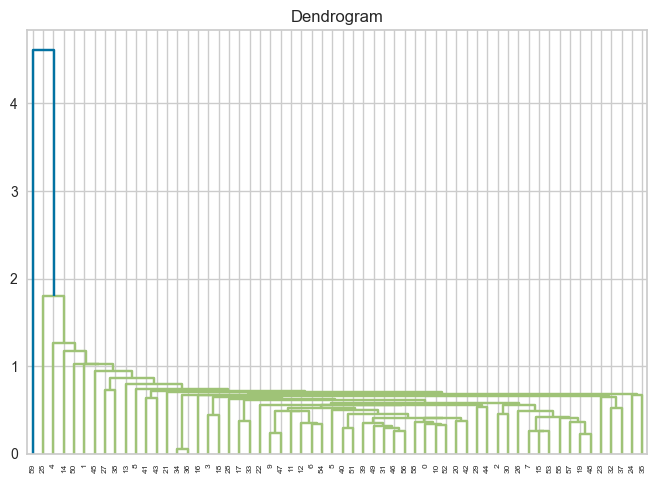

In [147]:
# tree arrangement of clusters for first 60 observations 

dendrogram = sch.dendrogram(sch.linkage(pcaValues[:60],
                                        method='single'))
plt.title('Dendrogram')
plt.show()

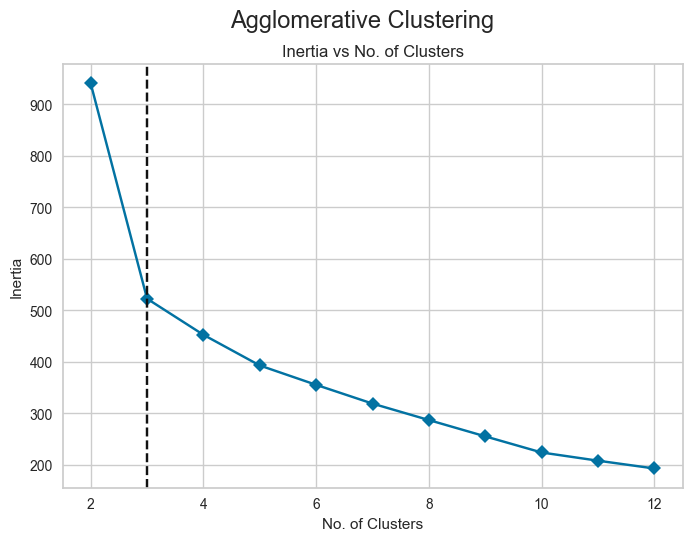

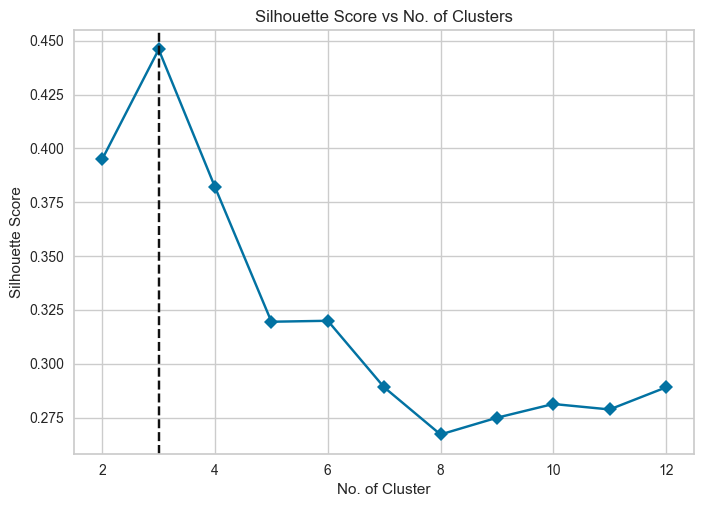

In [148]:
model = AgglomerativeClustering()
visInertia = KElbowVisualizer(model,k=(2,13),timings=False)
visInertia.fit(pcaValues)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.suptitle('Agglomerative Clustering',fontsize=17)
plt.title('Inertia vs No. of Clusters')
plt.show()

visSilh = KElbowVisualizer(model,k=(2,13),
                           metric='silhouette',
                           timings=False)
plt.title('Silhouette Score vs No. of Clusters')
plt.xlabel('No. of Cluster')
plt.ylabel('Silhouette Score')
visSilh.fit(pcaValues)
plt.show()

In [149]:
# final Agglomerative (hierarchical clustering) with 
# No. of clusters = 3

final_hc = AgglomerativeClustering(n_clusters=visInertia.elbow_value_,
                                   affinity='euclidean',
                                   linkage='single')
final_hc.fit(pcaValues)

AgglomerativeClustering(linkage='single', n_clusters=3)

In [150]:
paMatrix = pd.crosstab(final_hc.labels_,
                       target.values.ravel())

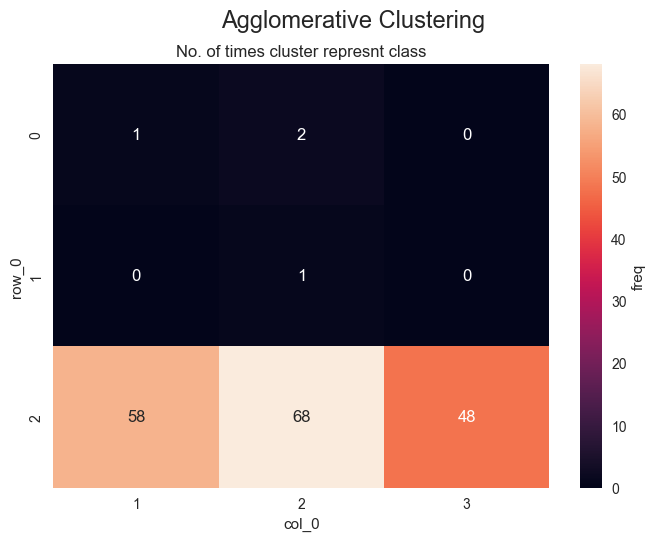

In [151]:
# presence/absense matrix
sns.heatmap(paMatrix,
            cbar_kws={'label':'freq'},
            annot=True)
plt.suptitle('Agglomerative Clustering',fontsize=17)
plt.title('No. of times cluster represnt class')
plt.show()

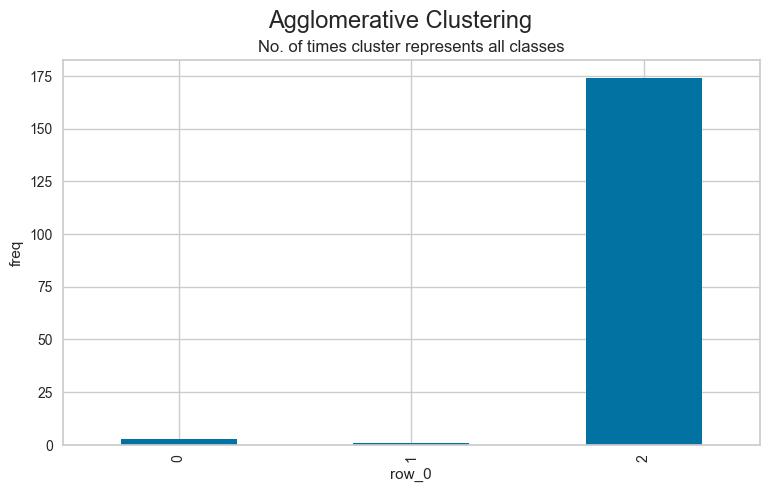

In [152]:
# No. of classes represented by each cluster 
plt.figure(figsize=(9,5))
paMatrix.sum(axis=1).plot(kind='bar')
plt.suptitle('Agglomerative Clustering',fontsize=17)
plt.title('No. of times cluster represents all classes')
plt.ylabel('freq')
plt.show()

In [153]:
wine['clusterID'] = final_hc.labels_
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterID
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [154]:
score = silhouette_score(pcaValues,
                         final_hc.labels_)*100
score

21.662871644125776

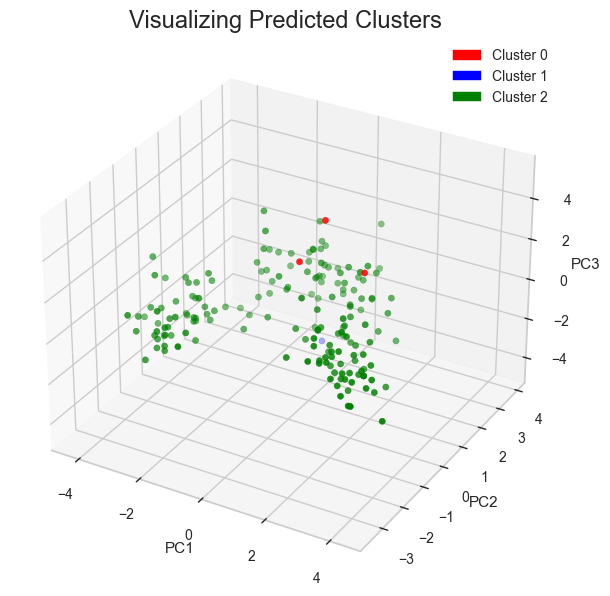

In [155]:
point_agg = final_hc.labels_.copy().astype('object') 
point_agg[point_agg == 0] = 'red'
point_agg[point_agg == 1] = 'blue'
point_agg[point_agg == 2] = 'green'
# Principle Component Coordinates
pcX = pcaValues[:,0]
pcY = pcaValues[:,1]
pcZ = pcaValues[:,2]
fig = plt.figure()
ax = Axes3D(fig)
scatter = ax.scatter3D(pcX,pcY,pcZ,c=point_agg)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Visualizing Predicted Clusters',fontsize=17)
plt.legend(handles=[mpatches.Patch(color='red',label='Cluster 0'),
                    mpatches.Patch(color='blue',label='Cluster 1'),
                    mpatches.Patch(color='green',label='Cluster 2')])
plt.show()

## Non Hierarchical Clustering

## KMeans Clustering

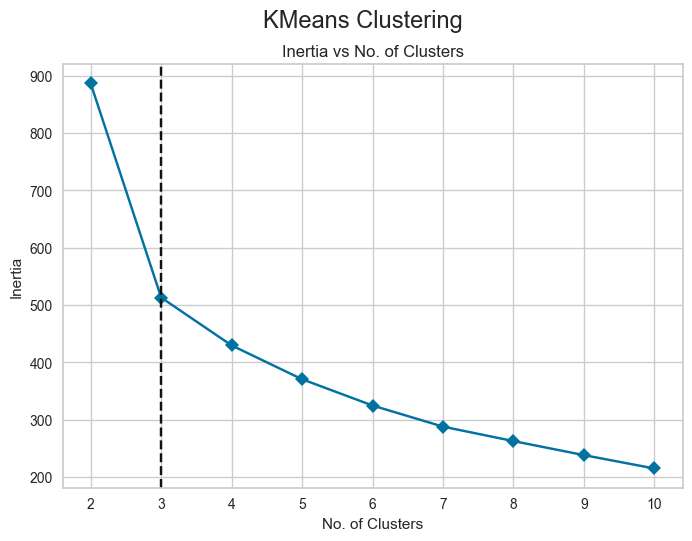

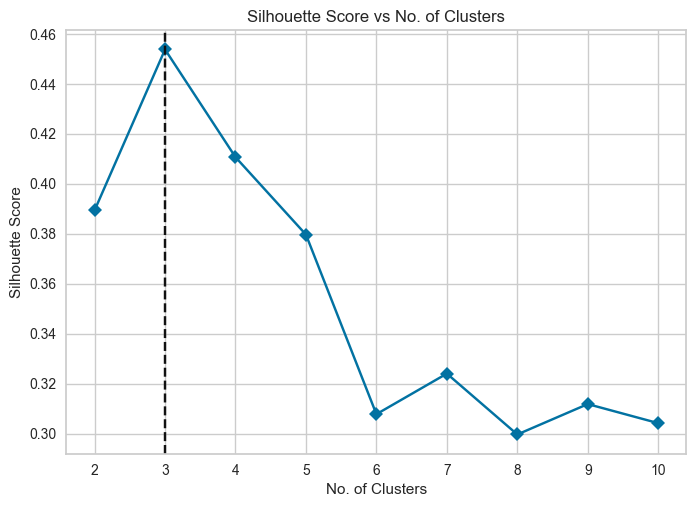

In [156]:
model = KMeans(random_state=42)
visInertia = KElbowVisualizer(model,k=(2,11),timings=False)
visInertia.fit(pcaValues)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.suptitle('KMeans Clustering',fontsize=17)
plt.title('Inertia vs No. of Clusters')
plt.show()

visSilh = KElbowVisualizer(model,k=(2,11),
                           metric='silhouette',
                           timings=False)
plt.title('Silhouette Score vs No. of Clusters')
plt.xlabel('No. of Clusters')
plt.ylabel('Silhouette Score')
visSilh.fit(pcaValues)
plt.show()

In [157]:
# final KMeans (non-hierarchical clustering) with 
#No. of clusters = 3
final_kmeans = KMeans(n_clusters=visInertia.elbow_value_,
                      random_state=42)
final_kmeans.fit(pcaValues)

KMeans(n_clusters=3, random_state=42)

In [158]:
paMatrix_KMeans = pd.crosstab(final_kmeans.labels_,
                              target.values.ravel())

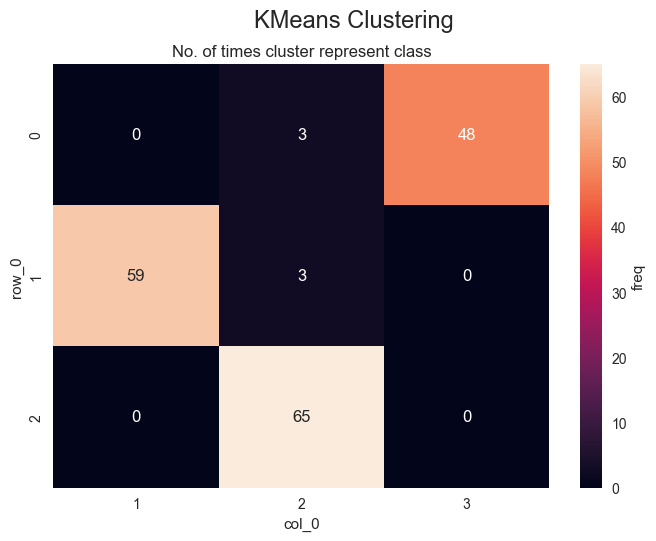

In [159]:
# presence/absence matrix 
sns.heatmap(paMatrix_KMeans,
            cbar_kws={'label':'freq'},
            annot=True)
plt.title('No. of times cluster represent class')
plt.suptitle('KMeans Clustering',fontsize=17)
plt.show()

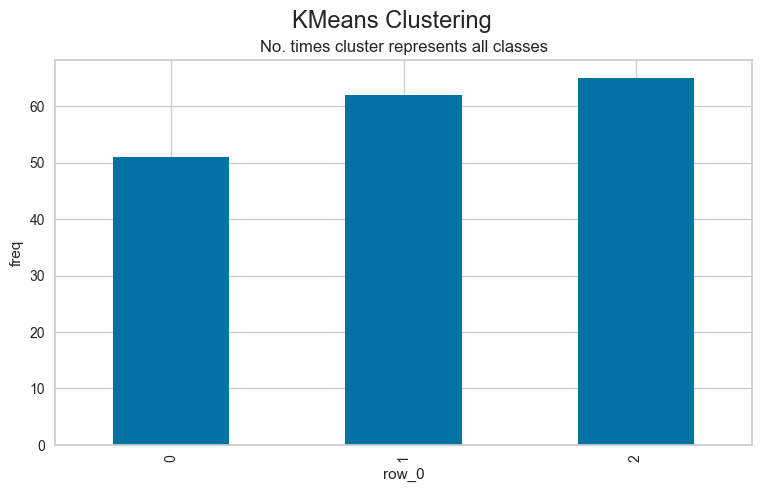

In [160]:
# No. of classes represented by each cluster
plt.figure(figsize=(9,5))
paMatrix_KMeans.sum(axis=1).plot(kind='bar')
plt.suptitle('KMeans Clustering',fontsize=17)
plt.title('No. times cluster represents all classes')
plt.ylabel('freq')
plt.show()

In [161]:
wine['clusterID'] = final_kmeans.labels_
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterID
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [162]:
score = silhouette_score(pcaValues,
                         final_kmeans.labels_)*100
score

45.379998482576156

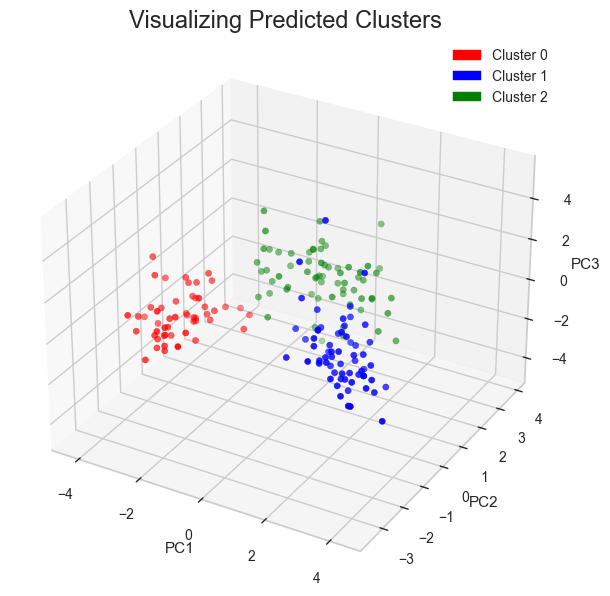

In [163]:
point_kmeans = final_kmeans.labels_.copy().astype('object') 
point_kmeans[point_kmeans == 0] = 'red'
point_kmeans[point_kmeans == 1] = 'blue'
point_kmeans[point_kmeans == 2] = 'green'
# Principle Component Coordinates
pcX = pcaValues[:,0]
pcY = pcaValues[:,1]
pcZ = pcaValues[:,2]
fig = plt.figure()
ax = Axes3D(fig)
scatter = ax.scatter3D(pcX,pcY,pcZ,c=point_kmeans)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Visualizing Predicted Clusters',fontsize=17)
plt.legend(handles=[mpatches.Patch(color='red',label='Cluster 0'),
                    mpatches.Patch(color='blue',label='Cluster 1'),
                    mpatches.Patch(color='green',label='Cluster 2')])
plt.show()

### KMeans Clustering with 3 clusters and silhouette Score of +45.38%% 